# Analysis

In [320]:
import itertools
import json
from keras.models import load_model, model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d

# Data Analysis

In [24]:
raw_data_path = "../../Histone-Semantic-Segmentation/data/chromosome/chromHmm_data_labels_generated.bed"
all_data = []
with open(raw_data_path, 'r') as f:
    for line in f:
        all_data.append(line.strip().split())

In [25]:
all_data

[['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '9'],
 ['0', '0', '0

In [29]:
# count number of bases
counts = [0] * 11
for data in all_data:
    counts[int(data[10])] += 1
counts

[0, 4208, 10845, 8137, 24441, 7455, 46527, 1179, 6238, 472943, 90288]

# Training Plots

In [342]:
#segnet_2_history = pickle.load(open("training_history/training_history/segnet-2-history.pickle", "rb"))
#segnet_3_history = pickle.load(open("training_history/training_history/segnet-3-history.pickle", "rb"))
#segnet_5_history = pickle.load(open("training_history/training_history/segnet-5-history.pickle", "rb"))

unet_2_history = pickle.load(open("training_history/training_history/unet-2-history.pickle", "rb"))
unet_3_history = pickle.load(open("training_history/training_history/unet-3-history.pickle", "rb"))
unet_5_history = pickle.load(open("training_history/training_history/unet-5-history.pickle", "rb"))

In [346]:
x_new = np.linspace(0, 29, 500)

## SEGNET ##
# kernel = 2
f_2 = interp1d(range(0, 30), segnet_2_history.history['val_loss'], kind='quadratic')
y_2_smooth=f_2(x_new)

# kernel = 3
f_3 = interp1d(range(0, 30), segnet_3_history.history['val_loss'], kind='quadratic')
y_3_smooth=f_3(x_new)

# kernel = 5
f_5 = interp1d(range(0, 30), segnet_5_history.history['val_loss'], kind='quadratic')
y_5_smooth=f_5(x_new)

## UNET ##
# kernel = 2
u_f_2 = interp1d(range(0, 30), unet_2_history.history['val_loss'], kind='quadratic')
u_y_2_smooth=u_f_2(x_new)

# kernel = 3
u_f_3 = interp1d(range(0, 30), unet_3_history.history['val_loss'], kind='quadratic')
u_y_3_smooth=u_f_3(x_new)

# kernel = 5
u_f_5 = interp1d(range(0, 30), unet_5_history.history['val_loss'], kind='quadratic')
u_y_5_smooth=u_f_5(x_new)

Text(0.5, 1.0, 'Kernel Size of 2')

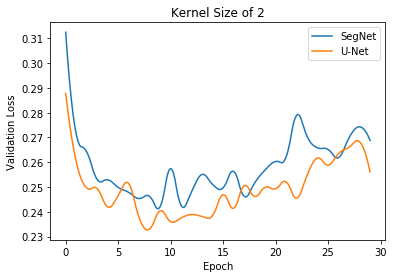

In [349]:
plt.plot(x_new, y_2_smooth)
plt.plot(x_new, u_y_2_smooth)


plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.legend(["SegNet", "U-Net"], loc='upper right')
plt.title("Kernel Size of 2")

Text(0.5, 1.0, 'Kernel Size of 3')

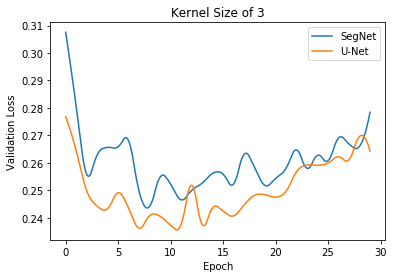

In [353]:
plt.plot(x_new, y_3_smooth)
plt.plot(x_new, u_y_3_smooth)


plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.legend(["SegNet", "U-Net"], loc='upper right')
plt.title("Kernel Size of 3")

Text(0.5, 1.0, 'Kernel Size of 5')

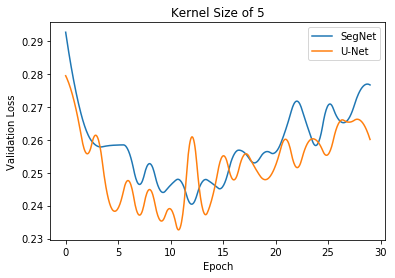

In [351]:
plt.plot(x_new, y_5_smooth)
plt.plot(x_new, u_y_5_smooth)


plt.ylabel("Validation Loss")
plt.xlabel("Epoch")
plt.legend(["SegNet", "U-Net"], loc='upper right')
plt.title("Kernel Size of 5")

# Load Test Data

In [6]:
test_x = np.load("data/test_x.npy")
test_y = np.load("data/test_y.npy")

# Load Model

In [197]:
segnet_3_model = model_from_json(open("model_structures/segnet-model-3.json", 'r').read())
segnet_3_model.load_weights("checkpoints/segnet-weights-3-improvement-07-0.25.hdf5")

unet_3_model = model_from_json(open("model_structures/unet-model-3.json", 'r').read())
unet_3_model.load_weights("checkpoints/unet-weights-3-improvement-06-0.24.hdf5")

# Occlusions

In [188]:
# use index 12
idx = 12
print(test_x[12])
print(np.argmax(test_y, axis = 2)[12])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]
[8 8 8 8 8 7 7 0 0 9 9 9 9 9 3 3]


In [189]:
preds_true = segnet_3_model.predict(test_x[12].reshape(1, 16, 10))

In [190]:
# create occlusions and store results
probs = []
for i in range(len(test_x[idx])):
    sample = test_x[idx].copy()
    sample[i, :] = 0
    sample_preds = segnet_3_model.predict(sample.reshape(1, 16, 10))
    probs.append(sample_preds[0, 9, 9])
print(probs)

[0.16253561, 0.4589292, 0.4589292, 0.4589292, 0.4589292, 0.34724882, 0.38538396, 0.74029416, 0.71354437, 0.4589292, 0.4589292, 0.09336693, 0.4589292, 0.4589292, 0.5247582, 0.51998305]


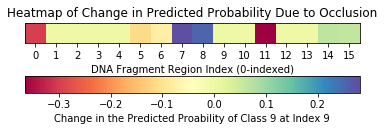

In [192]:
ax = plt.gca()
im = ax.imshow(np.array(probs).reshape(1, -1) - preds_true[0,9,9], cmap='Spectral')
cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label("Change in the Predicted Proability of Class 9 at Index 9")
plt.xticks(np.arange(0, 16, 1))
plt.yticks([])
plt.xlabel("DNA Fragment Region Index (0-indexed)")
ax.set_title('Heatmap of Change in Predicted Probability Due to Occlusion')
plt.show()
#plt.imshow(np.array(probs).reshape(1, -1), cmap='hot')
#sns.heatmap(np.array(probs).reshape(-1, 1), annot=True,  linewidths=.5)

In [311]:
# use index 12
idx = 32
print(test_x[idx])
print(np.argmax(test_y, axis = 2)[idx])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


In [312]:
preds_true = segnet_3_model.predict(test_x[32].reshape(1, 16, 10))

In [313]:
# create occlusions and store results
probs = []
for i in range(len(test_x[idx])):
    sample = test_x[idx].copy()
    sample[i, :] = 0
    sample_preds = segnet_3_model.predict(sample.reshape(1, 16, 10))
    probs.append(sample_preds[0, 9, 9])
print(probs)

[0.13272522, 0.13272522, 0.017298741, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522, 0.13272522]


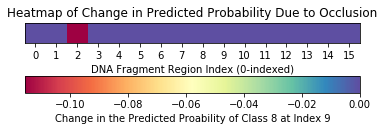

In [315]:
ax = plt.gca()
im = ax.imshow(np.array(probs).reshape(1, -1) - preds_true[0,9,9], cmap='Spectral')
cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label("Change in the Predicted Proability of Class 8 at Index 9")
plt.xticks(np.arange(0, 16, 1))
plt.yticks([])
plt.xlabel("DNA Fragment Region Index (0-indexed)")
ax.set_title('Heatmap of Change in Predicted Probability Due to Occlusion')
plt.show()

# Effect of Skip Connections

In [198]:
segnet_preds = segnet_3_model.predict(test_x)
unet_preds = unet_3_model.predict(test_x)

In [202]:
np.argmax(segnet_preds[1:2], axis = 2)

array([[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]], dtype=int64)

In [205]:
segnet_classes = np.argmax(segnet_preds, axis = 2)
unet_classes = np.argmax(unet_preds, axis = 2)
test_classes = np.argmax(test_y, axis = 2)

In [207]:
def find_grainy(preds, true_preds, window_size = 1):
    count = 0
    correct = 0
    for i in range(len(preds)):
        row = preds[i]
        padded_row = [-1] + list(preds) + [-1]
        padded_true_row = [-1] + list(true_preds) + [-1]
        
        for j in range(1, len(padded_row) - 1):
            # Check that all regions have same classes
            if np.array_equal(padded_true_row[j: j + window_size], [padded_true_row[j]] * window_size):
                count += 1
                if np.array_equal(padded_true_row[j: j + window_size], padded_row[j: j + window_size]):
                    correct += 1
                    
    return count, correct  

# Confusion Matrices

In [277]:
def generate_confusion(preds, true_preds):
    confusion_table = np.zeros((10, 10), dtype = np.float)
    
    # false predictions
    diff_locs = np.where(preds != true_preds)
    diff_preds = preds[diff_locs[0], diff_locs[1]]
    diff_true_preds = true_preds[diff_locs[0], diff_locs[1]]
    
    for i in range(len(diff_preds)):
        confusion_table[diff_true_preds[i], diff_preds[i]] += 1
        
    #true predictions
    same_locs = np.where(preds == true_preds)
    same_preds = preds[same_locs[0], same_locs[1]]
    same_true_preds = true_preds[same_locs[0], same_locs[1]]
    
    for i in range(len(diff_preds)):
        confusion_table[same_true_preds[i], same_preds[i]] += 1
    print(confusion_table.shape)
    print(confusion_table.sum(axis = 1).reshape(10, 1).shape)
    return confusion_table / confusion_table.sum(axis = 1).reshape(10, 1) #np.sum(confusion_table, axis = 1)

In [296]:
unet_confusion = generate_confusion(unet_classes, test_classes)
segnet_confusion = generate_confusion(segnet_classes, test_classes)

(10, 10)
(10, 1)
(10, 10)
(10, 1)


In [297]:
segnet_confusion

array([[2.24669604e-01, 2.95154185e-01, 1.01321586e-01, 1.36563877e-01,
        5.28634361e-02, 0.00000000e+00, 1.32158590e-02, 4.40528634e-02,
        8.37004405e-02, 4.84581498e-02],
       [1.09589041e-01, 6.57534247e-01, 2.05479452e-01, 4.56621005e-03,
        1.82648402e-02, 0.00000000e+00, 0.00000000e+00, 4.56621005e-03,
        0.00000000e+00, 0.00000000e+00],
       [5.15463918e-02, 3.40206186e-01, 2.16494845e-01, 2.26804124e-01,
        1.47766323e-01, 3.43642612e-03, 0.00000000e+00, 6.87285223e-03,
        6.87285223e-03, 0.00000000e+00],
       [7.25646123e-02, 1.49105368e-02, 1.74950298e-01, 1.71968191e-01,
        9.44333996e-02, 2.38568588e-02, 7.95228628e-03, 1.19284294e-02,
        3.84691849e-01, 4.27435388e-02],
       [1.14503817e-02, 0.00000000e+00, 7.63358779e-02, 1.03053435e-01,
        3.62595420e-01, 2.13740458e-01, 1.67938931e-01, 7.63358779e-03,
        3.05343511e-02, 2.67175573e-02],
       [0.00000000e+00, 1.06609808e-03, 0.00000000e+00, 5.86353945e-03,
   

In [298]:
unet_confusion

array([[2.99539171e-01, 2.71889401e-01, 1.52073733e-01, 8.75576037e-02,
        2.76497696e-02, 4.60829493e-03, 1.38248848e-02, 4.60829493e-02,
        5.99078341e-02, 3.68663594e-02],
       [1.10552764e-01, 6.93467337e-01, 1.90954774e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.02512563e-03,
        0.00000000e+00, 0.00000000e+00],
       [7.33944954e-02, 4.08256881e-01, 2.38532110e-01, 1.92660550e-01,
        5.50458716e-02, 4.58715596e-03, 4.58715596e-03, 1.37614679e-02,
        9.17431193e-03, 0.00000000e+00],
       [7.12589074e-02, 1.66270784e-02, 2.04275534e-01, 1.93586698e-01,
        8.66983373e-02, 3.44418052e-02, 7.12589074e-03, 1.54394299e-02,
        3.18289786e-01, 5.22565321e-02],
       [0.00000000e+00, 0.00000000e+00, 1.82509506e-01, 1.36882129e-01,
        2.92775665e-01, 2.47148289e-01, 1.21673004e-01, 3.80228137e-03,
        1.52091255e-02, 0.00000000e+00],
       [0.00000000e+00, 1.87734668e-03, 2.50312891e-03, 1.06382979e-02,
   

Text(0.5, 0, 'Predicted label')

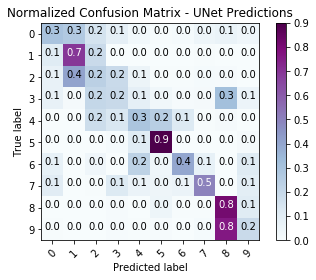

In [301]:
plt.imshow(unet_confusion, interpolation='nearest', cmap="BuPu")
plt.title("Normalized Confusion Matrix - UNet Predictions")
plt.colorbar()
tick_marks = range(10)
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks)
thresh = unet_confusion.max() / 2.
for i, j in itertools.product(range(unet_confusion.shape[0]), range(unet_confusion.shape[1])):
    plt.text(j, i, format(unet_confusion[i, j], '.1f'),
             horizontalalignment="center",
             color="white" if unet_confusion[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.tight_layout()

Text(0.5, 0, 'Predicted label')

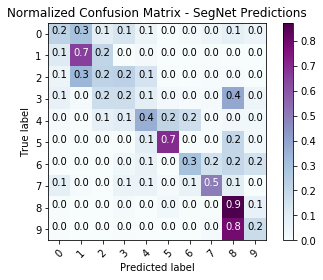

In [306]:
plt.imshow(segnet_confusion, interpolation='nearest', cmap="BuPu")
plt.title("Normalized Confusion Matrix - SegNet Predictions")
plt.colorbar()
tick_marks = range(10)
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks)
thresh = segnet_confusion.max() / 2.
for i, j in itertools.product(range(segnet_confusion.shape[0]), range(segnet_confusion.shape[1])):
    plt.text(j, i, format(segnet_confusion[i, j], '.1f'),
             horizontalalignment="center",
             color="white" if segnet_confusion[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')